# Libraries

In [256]:
# Scikit learn
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.datasets import fetch_mldata

# Others
import csv

# Mauna Loa

In [11]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels \
    import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared
from sklearn.datasets import fetch_mldata

data = fetch_mldata('mauna-loa-atmospheric-co2').data
X = data[:, [1]]
y = data[:, 0]


# Kernel with optimized parameters
k1 = 50.0**2 * RBF(length_scale=50.0)  # long term smooth rising trend
k2 = 2.0**2 * RBF(length_scale=100.0) \
    * ExpSineSquared(length_scale=1.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component
# medium term irregularities
k3 = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)
k4 = 0.1**2 * RBF(length_scale=0.1) \
    + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, np.inf))  # noise terms
    
kernel = k1 + k2 + k4

gp = GaussianProcessRegressor(kernel=kernel, alpha=0, normalize_y=True)

gp.fit(X, y)

print("\nLearned kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
y_pred, y_std = gp.predict(X_, return_std=True)


Learned kernel: 31.4**2 * RBF(length_scale=39.4) + 3.43**2 * RBF(length_scale=186) * ExpSineSquared(length_scale=1.47, periodicity=1) + 0.402**2 * RBF(length_scale=0.33) + WhiteKernel(noise_level=0.0422)
Log-marginal-likelihood: -104.731


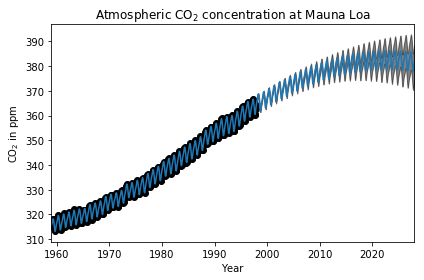

In [12]:
# Illustration
plt.scatter(X, y, c='k')
plt.plot(X_, y_pred)
plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

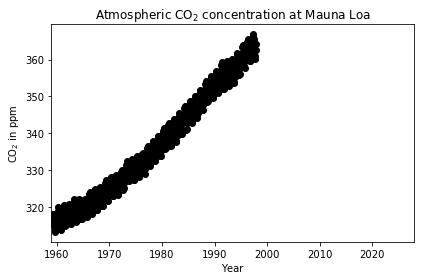

In [10]:
# Illustration
plt.scatter(X, y, c='k')
#plt.plot(X_, y_pred)
#plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std, alpha=0.5, color='k')
plt.xlim(X_.min(), X_.max())
plt.xlabel("Year")
plt.ylabel(r"CO$_2$ in ppm")
plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
plt.tight_layout()
plt.show()

# Import CSV

In [148]:
data = np.genfromtxt(fname = "data/for_composititional_analysis.csv", 
                     delimiter = ',',
                     usecols = (1,2,3,4,5),
                     skip_header = 1,
                     dtype=None)

First individual~condition~scenario

In [149]:
first = data[data['f0'] == 1]

In [150]:
x = first['f3']
y = first['f4']

In [151]:
# Transformation of array to matrix
X = []
for i in range(len(x)):
    X.append([x[i]])
X = np.array(X)

### GP Fit

`Documentation:`
- [`All Kernels`](http://scikit-learn.org/stable/modules/classes.html)
  - [`Periodic (aka ExpSineSquared)`](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.ExpSineSquared.html#sklearn.gaussian_process.kernels.ExpSineSquared)
  - [`RBF`](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html#sklearn.gaussian_process.kernels.RBF)
  - [`DotProduct`](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.DotProduct.html#sklearn.gaussian_process.kernels.DotProduct)
- [`Gaussian Processes`](http://scikit-learn.org/stable/modules/gaussian_process.html)
  - [`GaussianProcessRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html)

Compute GP

In [272]:
def compute(X, y, kernel):
    gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer='fmin_l_bfgs_b')
    gp.fit(X, y)

    #print("\nLearned kernel: %s" % gp.kernel_)
    #print("Log-marginal-likelihood: %.3f" % gp.log_marginal_likelihood(gp.kernel_.theta))
    return gp

In [273]:
def lml(gp):
    """Log marginal likelihood of a GP"""
    return gp.log_marginal_likelihood(gp.kernel_.theta)

Plot GP

In [274]:
def plot_gp(X, y, gp):
    X_ = np.linspace(X.min(), X.max() + 30, 1000)[:, np.newaxis]
    y_pred, y_std = gp.predict(X_, return_std=True)

    # Illustration
    plt.scatter(X, y, c='k')
    plt.plot(X_, y_pred)
    plt.fill_between(X_[:, 0], y_pred - y_std, y_pred + y_std,
                     alpha=0.5, color='k')
    plt.xlim(X_.min(), X_.max())
    plt.xlabel("Year")
    plt.ylabel(r"CO$_2$ in ppm")
    plt.title(r"Atmospheric CO$_2$ concentration at Mauna Loa")
    plt.tight_layout()
    plt.show()

Calculate GPs

In [284]:
def compute_gps(X, y):
    # Kernel with optimized parameters
    l = DotProduct()
    p = ExpSineSquared()
    r = RBF()

    gps = {}

    #gps['l'] = compute(X, y, l)
    gps['p'] = compute(X, y, p)
    gps['r'] = compute(X, y, r)

    gps['p+r'] = compute(X, y, p+r)
    gps['p*r'] = compute(X, y, p*r)
    
    return gps

gps = compute_gps(X, y)

C:\Users\panch\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  3.04391828e+08,  -3.00147072e+10]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 134, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\panch\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.32663678]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 65, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
C:\Users\panch\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-335.03643486,  169.11916988,   -0.86698497]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 136, 'nit': 26, 'warnflag': 2}
  " state: %s" % convergence_dict)


In [280]:
lml(gps['p'])

-74265284.158205494